<a href="https://colab.research.google.com/github/nbacomdados/nbacomdados/blob/main/notebooks/analise1_BucksXNets_jogo7_Leste_SemiFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
df_jogo = pd.read_csv('https://raw.githubusercontent.com/3x3post/3x3post/main/dados/0042000217_Nets_Bucks/0042000217_players_statistics.csv')
df_jogo.head()

,personId,firstName,familyName,nameI,playerSlug,position,comment,jerseyNum,statistics.minutes,statistics.fieldGoalsMade,...,statistics.reboundsTotal,statistics.assists,statistics.steals,statistics.blocks,statistics.turnovers,statistics.foulsPersonal,statistics.points,statistics.plusMinusPoints,teamName,Q
0,200782,P.J.,Tucker,P. Tucker,pj-tucker,F,NaN,NaN,8:37,1,...,1,0,0,2,0,1,3,0.0,Bucks,1
1,203507,Giannis,Antetokounmpo,G. Antetokounmpo,giannis-antetokounmpo,F,NaN,NaN,11:18,4,...,2,1,0,1,1,1,10,-3.0,Bucks,1
2,201572,Brook,Lopez,B. Lopez,brook-lopez,C,NaN,NaN,11:23,1,...,2,1,0,0,0,0,3,-1.0,Bucks,1
3,203114,Khris,Middleton,K. Middleton,khris-middleton,G,NaN,NaN,11:21,2,...,5,1,0,0,1,0,5,-4.0,Bucks,1
4,201950,Jrue,Holiday,J. Holiday,jrue-holiday,G,NaN,NaN,12:00,2,...,1,1,0,0,1,1,4,-3.0,Bucks,1


In [11]:
df_jogo.columns

Index(['personId', 'firstName', 'familyName', 'nameI', 'playerSlug',
       'position', 'comment', 'jerseyNum', 'statistics.minutes',
       'statistics.fieldGoalsMade', 'statistics.fieldGoalsAttempted',
       'statistics.fieldGoalsPercentage', 'statistics.threePointersMade',
       'statistics.threePointersAttempted',
       'statistics.threePointersPercentage', 'statistics.freeThrowsMade',
       'statistics.freeThrowsAttempted', 'statistics.freeThrowsPercentage',
       'statistics.reboundsOffensive', 'statistics.reboundsDefensive',
       'statistics.reboundsTotal', 'statistics.assists', 'statistics.steals',
       'statistics.blocks', 'statistics.turnovers', 'statistics.foulsPersonal',
       'statistics.points', 'statistics.plusMinusPoints', 'teamName', 'Q'],
      dtype='object')

In [26]:
agrupamento = df_jogo.groupby(['teamName', 'Q'])
pontos_um = agrupamento['statistics.freeThrowsMade'].sum()
pontos_dois = (agrupamento['statistics.fieldGoalsMade'].sum() - agrupamento['statistics.threePointersMade'].sum()) * 2
pontos_tres = agrupamento['statistics.threePointersMade'].sum() * 3
pontos = pontos_um + pontos_dois + pontos_tres
pontos.reset_index().pivot_table(index='teamName', values=0, columns='Q').sum(axis=1)

teamName
Bucks    115
Nets     111
dtype: int64

Bucks turnovers 7
Nets turnovers 13


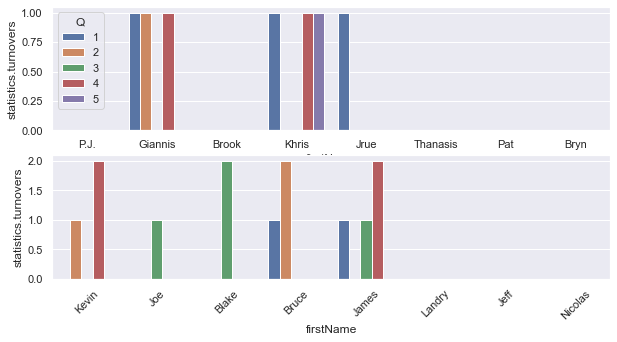

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))

sns.barplot(data=df_jogo.query('teamName == "Bucks"'), y='statistics.turnovers', x='firstName', hue='Q', ax=axs[0])
plt.xticks(rotation=45)
total = df_jogo.query('teamName == "Bucks"')['statistics.turnovers'].sum()
print(f"Bucks turnovers {total}")

sns.barplot(data=df_jogo.query('teamName == "Nets"'), y='statistics.turnovers', x='firstName', hue='Q', ax=axs[1])
plt.xticks(rotation=45)
total = df_jogo.query('teamName == "Nets"')['statistics.turnovers'].sum()
print(f"Nets turnovers {total}")

plt.legend('').set_visible(False)

plt.show()

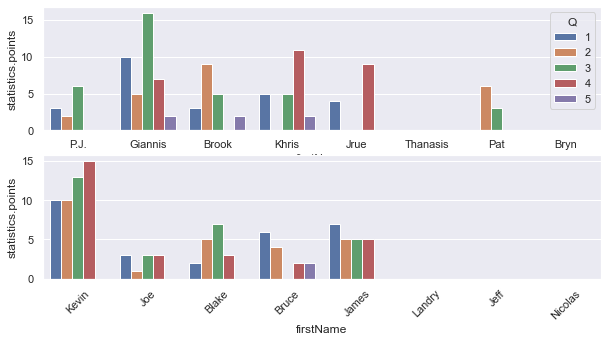

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))

sns.barplot(data=df_jogo.query('teamName == "Bucks"'), y='statistics.points', x='firstName', hue='Q', ax=axs[0])
plt.xticks(rotation=45)


sns.barplot(data=df_jogo.query('teamName == "Nets"'), y='statistics.points', x='firstName', hue='Q', ax=axs[1])
plt.xticks(rotation=45)
plt.legend('').set_visible(False)

plt.show()

In [15]:
agrupamento = df_jogo.groupby(['teamName'])
cesta_um = agrupamento['statistics.freeThrowsMade'].sum()
cesta_dois = (agrupamento['statistics.fieldGoalsMade'].sum() - agrupamento['statistics.threePointersMade'].sum())
cesta_tres = agrupamento['statistics.threePointersMade'].sum()
cesta_total = cesta_um + cesta_dois + cesta_tres
porcentagem_um = cesta_um / cesta_total * 100
porcentagem_dois = cesta_dois / cesta_total * 100
porcentagem_tres = cesta_tres / cesta_total * 100
df = pd.concat([porcentagem_um, porcentagem_dois, porcentagem_tres], axis=1)
df.columns = ['freeThrows', 'twoPoint', 'treePoint']
df

,freeThrows,twoPoint,treePoint
teamName,,,
Bucks,24.561404,49.122807,26.315789
Nets,35.000000,45.000000,20.000000


In [42]:
df_jogo.query('firstName == "Bruce" or firstName == "Kevin"')[['statistics.plusMinusPoints', 'Q', 'statistics.minutes', 'firstName']]

,statistics.plusMinusPoints,Q,statistics.minutes,firstName
8,3.0,1,12:00,Kevin
11,4.0,1,11:21,Bruce
20,3.0,2,12:00,Kevin
23,3.0,2,12:00,Bruce
34,-7.0,3,12:00,Kevin
37,-9.0,3,11:52,Bruce
48,1.0,4,12:00,Kevin
51,-1.0,4,11:55,Bruce
61,-4.0,5,5:00,Kevin
64,-4.0,5,5:00,Bruce


In [33]:
df_jogo.groupby(['Q', 'teamName'])['statistics.points'].sum()

Q  teamName
1  Bucks       25
   Nets        28
2  Bucks       22
   Nets        25
3  Bucks       35
   Nets        28
4  Bucks       27
   Nets        28
5  Bucks        6
   Nets         2
Name: statistics.points, dtype: int64